# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Ehsan Liaqat

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns

all_data = pd.read_csv('seeds_dataset.txt', delimiter ='\t', header = None)
all_data.head(5)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [5]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

all_data.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4',
                      'Feature 5', 'Feature 6', 'Feature 7', 'Target Vector']

X = all_data.drop('Target Vector', axis = 1)
y = all_data['Target Vector']

print(X.describe())
print(X.shape)
print(y.shape)

        Feature 1   Feature 2   Feature 3   Feature 4   Feature 5   Feature 6  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

        Feature 7  
count  210.000000  
mean     5.408071  
std      0.491480  
min      4.519000  
25%      5.045000  
50%      5.223000  
75%      5.877000  
max      6.550000  
(210, 7)
(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Looking from the datasets details, most values are between 1 to 20 and positive and we should use StandardScaler, since all the data seems to have a normal distribution. We cannot use RobustScaler as some values are close to 0 and we cannot use MinMaxScale as the values are between 1 to 20 which is small.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [23]:
# TODO: Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [22]:
# TODO: Print the shape of the training feature matrix and target vector

print(X_train.shape)
print(y_train.shape)

(157, 7)
(157,)


Now that we have our training data, we can implement our selected scaler.

In [21]:
# TODO: Scale the data

from sklearn.preprocessing import StandardScaler

scale_std = StandardScaler()
scale_std.fit(X_train)
X_train_scl = scale_std.transform(X_train)
X_test_scl = scale_std.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [28]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(max_iter = 5000)
Log_Reg.fit(X_train_scl, y_train)

LogisticRegression(max_iter=5000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [29]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [32]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Log_Reg_grid_search = GridSearchCV(Log_Reg, param_grid , cv = 5, n_jobs = -1)
Log_Reg_grid_search.fit(X_train_scl, y_train)

y_pred_test = Log_Reg_grid_search.predict(X_test_scl)
test_score = accuracy_score(y_test, y_pred_test)

#Best Parameters
print("Best Parameters:", Log_Reg_grid_search.best_params_)
#Cross Validation
print("Cross-Validation Score:", Log_Reg_grid_search.best_score_)
#Accuracy Score
print("Test Score:", test_score)



Best Parameters: {'C': 10.0, 'fit_intercept': True}
Cross-Validation Score: 0.9368951612903226
Test Score: 0.9622641509433962


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [33]:
# TODO: Predict y labels using best estimator

LogReg_best = LogisticRegression(max_iter = 5000, C = 10, fit_intercept = True)
LogReg_best.fit(X_train_scl, y_train)

y_pred = LogReg_best.predict(X_test_scl)

In [53]:
# TODO: Reduce dimensions of test data for plotting

from sklearn.decomposition import PCA

pca = PCA(2)
X_red = pca.fit_transform(X_test_scl)

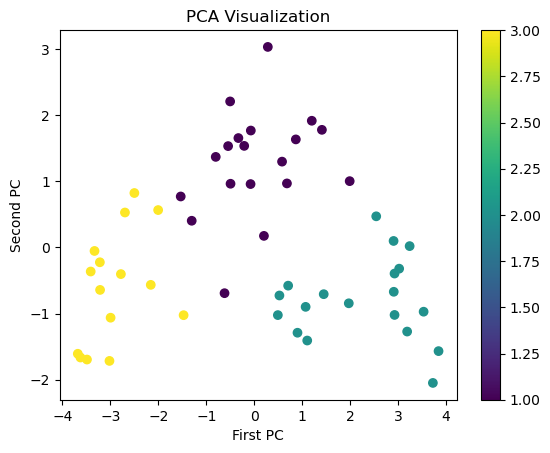

In [54]:
# TODO: Plot test points colored by predicted label

scatter = plt.scatter(X_red[:, 0], X_red[:, 1], c = y_pred, cmap = 'viridis')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('PCA Visualization')
plt.colorbar()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*

With a cross validation score of 0.936 and test score of 0.962, it appears the model works well. The test score is higher than the training score and the training and validaiton score are close, and the model shows low bias and low variance.

1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

Because we got a high test score, our model did a great job predicting labels. The graph shows each label in its own part of the chart. PCA helps by simplifying the features and reduces the dimensions of a feature matrix by creating a new vector that represents all feature, and it works well with straight-line datasets. So, since PCA and logistic regression worked well, it's likely our dataset is linear.

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

https://archive.ics.uci.edu/dataset/236/seeds

1. In what order did you complete the steps?

I began by loading the dataset and then scaled it using StandardScaler for preprocessing. Next, I divided the data, created a LogisticRegression model, and conducted a grid search to find optimal parameters. Cross-validation was employed to utilize all data sections for training. With the best parameters, a new LogisticRegression model was instantiated, and label predictions were made. Lastly, I applied PCA to reduce dimensions to 2 features and plotted the predicted labels along with the principal components.

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I did not use it, as most of the information was available in the labs.

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I used online search to understand some ideas when they are not clear.

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [44]:
# TODO: Scale feature matrix

scaler = StandardScaler()
scaler.fit(X)
X_scl = scaler.transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

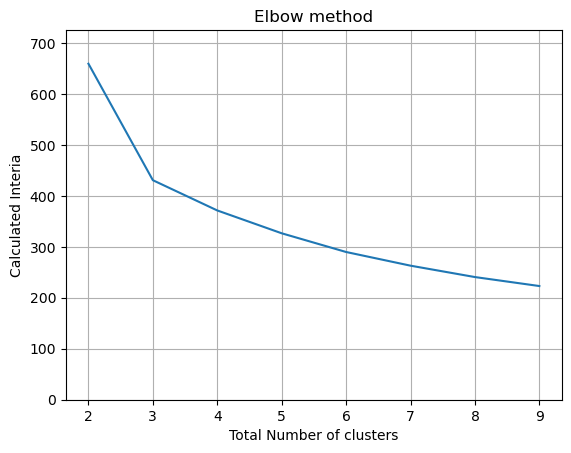

In [47]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42, n_init= 10).fit(X_scl)
    inertia.append(kmeans.inertia_ )
    
inertias = pd.DataFrame({'n_clusters': range(2, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')

#n_clusters = 3 is where bend appears

plt.xlabel('Total Number of clusters')
plt.ylabel('Calculated Interia')
plt.title('Elbow method')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)


Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [48]:
# TODO: Implement K-means with the number of clusters determined in the previous step

kmeans_model = KMeans(n_clusters = 3, random_state = 42, n_init= 10).fit(X_scl)

c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
# TODO: Calculate the three different validation metrics

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

labels = kmeans_model.labels_

sil_scr = silhouette_score(X_scl, labels)
cal_har_scr = calinski_harabasz_score(X_scl, labels)
dav_boul_scr = davies_bouldin_score(X_scl, labels)

print('Silhouette score:', sil_scr)
print('Calinski-Harabasz score:', cal_har_scr)
print('Davies-Bouldin score:', dav_boul_scr)

Silhouette score: 0.40072705527512986
Calinski-Harabasz score: 249.7841749161647
Davies-Bouldin score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

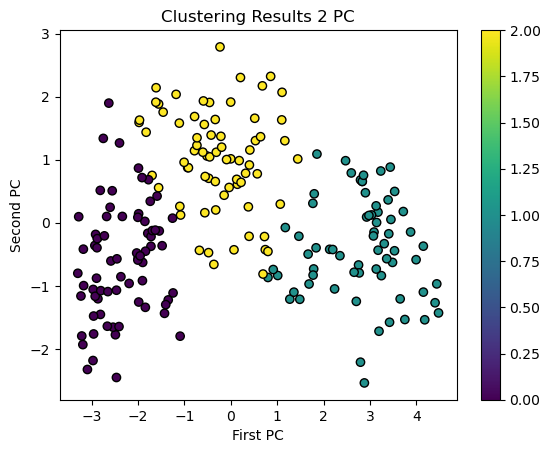

In [56]:
# TODO: Plot clustering results

pca = PCA(2)
X_red = pca.fit_transform(X_scl)

plt.scatter(X_red[:, 0], X_red[:, 1], c = labels, cmap = 'viridis', edgecolor='black')
plt.title('Clustering Results 2 PC')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.colorbar()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [59]:
# TODO: Find the number of principal components using explained variance ratio

pca = PCA().fit(X_scl)

# To use the attribute explained_variance_ratio of pca
variance = pca.explained_variance_ratio_.cumsum()
comp_num = 0
for comp in variance:
    if (comp >= 0.95):
        break
    else:
        comp_num += 1

#As we started on 0 we must add 1 to the result
comp_num += 1
print('Number of PC Needed:', comp_num)

Number of PC Needed: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [64]:
# TODO: Use PCA to transform the data

pca = PCA(comp_num).fit(X_scl)
X_red = pca.transform(X_scl)


In [65]:
# TODO: Implement K-means with the transformed data


kmeans_mdl = KMeans(n_clusters = 3, random_state = 42, n_init = 10).fit(X_red)

c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
# TODO: Calculate the three different validation metrics

labels = kmeans_mdl.labels_

sil_scr2 = silhouette_score(X_red, labels)
cal_har_scr2 = calinski_harabasz_score(X_red, labels)
dav_boul_scr2 = davies_bouldin_score(X_red, labels)

print('Silhouette score:', sil_scr2)
print('Calinski-Harabasz score:', cal_har_scr2)
print('Davies-Bouldin score:', dav_boul_scr2)

Silhouette score: 0.4100823639350388
Calinski-Harabasz score: 260.2885065635679
Davies-Bouldin score: 0.9030688438741872


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [69]:
# TODO: Display results

all_results = [[sil_scr, cal_har_scr, dav_boul_scr],[sil_scr2, cal_har_scr2, dav_boul_scr2]]
results = pd.DataFrame(all_results, columns=["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"],
                       index=['No PCA', 'With PCA'])


results

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
No PCA,0.400727,249.784175,0.927871
With PCA,0.410082,260.288507,0.903069


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*

It's evident that there are three classes. Therefore, it makes sense for our optimal number of clusters to be three.

1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*

Indeed, we obtained comparable results. The only distinction is that the PCA plot in part 1 has fewer data points than the PCA plot in part 2, as we only utilized a small portion of the dataset for testing in part 1.

1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*

I utilized 3 components to achieve 95% of the variance, and employing PCA positively impacted my results. The silhouette score is now closer to one, the Calinski-Harbasz score is higher, and the Davies-Bouldin score is closer to 1 with PCA. These changes suggest denser and more well-separated clusters.

PCA contributes to these improvements by reducing dimensionality, providing a more efficient data representation. It is particularly beneficial for clustering problems because it decreases features while retaining most of the variance, in our case, 95%. This reduction in features enhances cluster separation as PCA captures the directions of maximum variance.

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

https://archive.ics.uci.edu/dataset/

1. In what order did you complete the steps?

Initially, we applied a StandardScaler transformation to the entire feature matrix. Subsequently, we identified the optimal number of clusters using the elbow method. Following that, we instantiated a KMeans model with the optimal cluster count and calculated the silhouette score, Calinski-Harbasz score, and Davies-Bouldin score. The clustering results were then plotted.

Moving on to the next phase, we determined the number of PCA components needed to capture 95% of the variance. We reduced the data to this determined number of PCA components and instantiated a KMeans model. We then evaluated the silhouette score, Calinski-Harbasz score, and Davies-Bouldin score. Finally, we presented the results, including silhouette score, Calinski-Harbasz score, and Davies-Bouldin score, both with and without PCA, in a dataframe.

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I did not use it, as most of the information was available in the labs.

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I used online search to understand some ideas when they are not clear.


*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,

The assignment is linear and guided, it helps to understand the questions in a step by step manner.


- found interesting, confusing, challangeing, motivating
while working on this assignment.

Understanding the technical calculations or what is happening to dataset is sometimes difficult when we process it.


*ADD YOUR THOUGHTS HERE*